DATA620: Web Analytics Week 3
Omar Pineda
Fall 2019

1. Load a graph of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from Stanford Large Network Dataset Collection), please feel free at this point to load just a small subset of the nodes and edges.

Here we'll focus on a network of Facebook connections sourced from the following: J. McAuley and J. Leskovec. Learning to Discover Social Circles in Ego Networks. NIPS, 2012. https://snap.stanford.edu/data/ego-Facebook.html

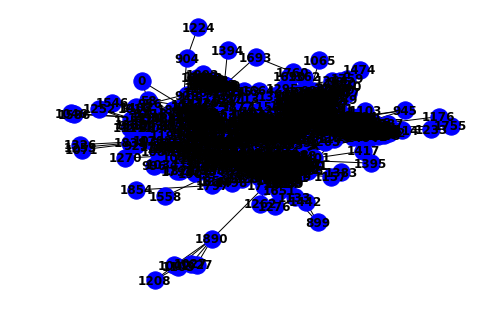

In [3]:
#Load libraries
import matplotlib.pyplot as plt
import networkx as nx
import random

#Load in a sample Facebook anonymized network
fb = nx.Graph()
edges = nx.read_edgelist('107.edges')
fb.add_edges_from(edges.edges())
nx.draw(fb, with_labels=True, font_weight='bold', node_color = 'blue')

In [4]:
fb.number_of_nodes()

1034

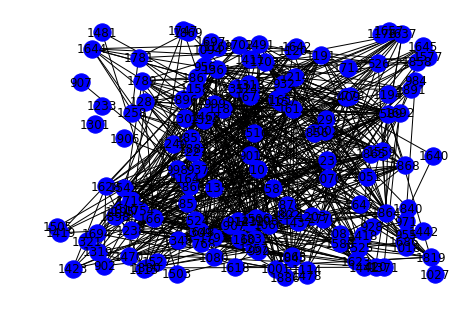

In [5]:
#Create a subgraph of this Facebook network, limiting it to 150 nodes, or people
subnodes = random.sample(fb.nodes, 150)
fbsub = fb.subgraph(subnodes)
nx.draw_random(fbsub, with_labels=True, node_color = 'blue')

2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package.

First we look at the diameter:

In [8]:
fbconnected = nx.connected_component_subgraphs(fbsub)
diameters = []
for g in fbconnected:
    d = nx.diameter(g, e=None, usebounds=False)
    diameters.append(d)
sortedDiam = sorted(diameters, reverse = True)
print sortedDiam
print sortedDiam[0] #gets largest diameter among the connected subgraphs of our 150 node graph

[11, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
11


We also look at the 10 most "popular" nodes, or those with the highest degree centrality:

In [24]:
deg = dict(nx.degree(fbsub))
def sorted_map(map):
    ms = sorted(map.iteritems(), key=lambda(k,v): (-v,k))
    return ms
dc = sorted_map(deg)
dc[0:9]

[(u'1589', 35),
 (u'1352', 34),
 (u'1768', 29),
 (u'1361', 28),
 (u'1559', 27),
 (u'1612', 26),
 (u'1238', 25),
 (u'1107', 24),
 (u'1833', 23)]

3. Use a visualization tool of your choice (NetworkX or some other tool) to display information.

In [27]:
#We export our graph as a .gml file for use in Gephi
nx.write_gml(fbsub, 'fbnetwork.gml')

4. Please record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.
Youtube link: https://youtu.be/jfRscXXNVVE